In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from utils.DomainImageGenerator import DomainImageGenerator

2025-07-16 13:28:17.731965: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:28:17.735831: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 13:28:17.748174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752665297.768443  645808 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752665297.774326  645808 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-16 13:28:17.795182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
test_gen = DomainImageGenerator("prepared/test.csv", batch_size=64, img_size=(32, 32), shuffle=False)

test_gen.shuffle_indexes()
test_indexes = test_gen.return_Indexes()
X_test = test_gen.return_Img_by_Index(test_indexes)
y_test = test_gen.return_Label_by_Index(test_indexes)

Loading images: 100%|███████████████████| 90000/90000 [00:57<00:00, 1565.27it/s]


In [3]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [4]:
accuracies = []
runs = 100

y_pred = np.random.randint(0, 2, size=len(y_test))
for _ in tqdm(range(runs)):
    y_rand = np.random.randint(0, 2, size=len(y_test))
    acc = accuracy_score(y_test, y_rand)
    accuracies.append(acc)

print(f"Average Accuracy over {runs} runs: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 382.20it/s]

Average Accuracy over 100 runs: 0.4997 ± 0.0016


In [5]:
print(classification_report(y_test, y_pred, target_names=["CIFAR-10", "ImageNet"]))

              precision    recall  f1-score   support

    CIFAR-10       0.22      0.50      0.31     20000
    ImageNet       0.78      0.50      0.61     70000

    accuracy                           0.50     90000
   macro avg       0.50      0.50      0.46     90000
weighted avg       0.65      0.50      0.54     90000



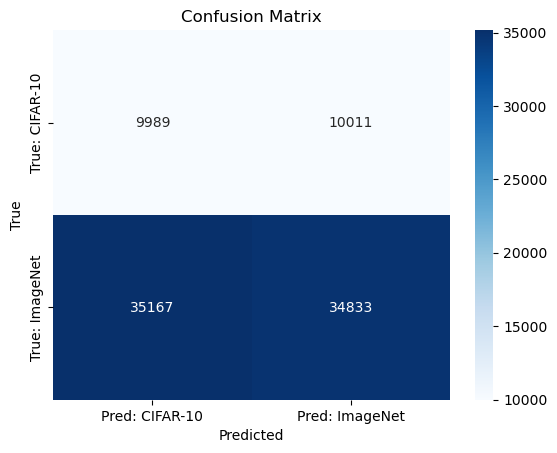

In [6]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: CIFAR-10", "Pred: ImageNet"],
            yticklabels=["True: CIFAR-10", "True: ImageNet"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()